# 1. GC состав

# 2. Распределение качества

# 3. Проверка результатов

## test.fastq

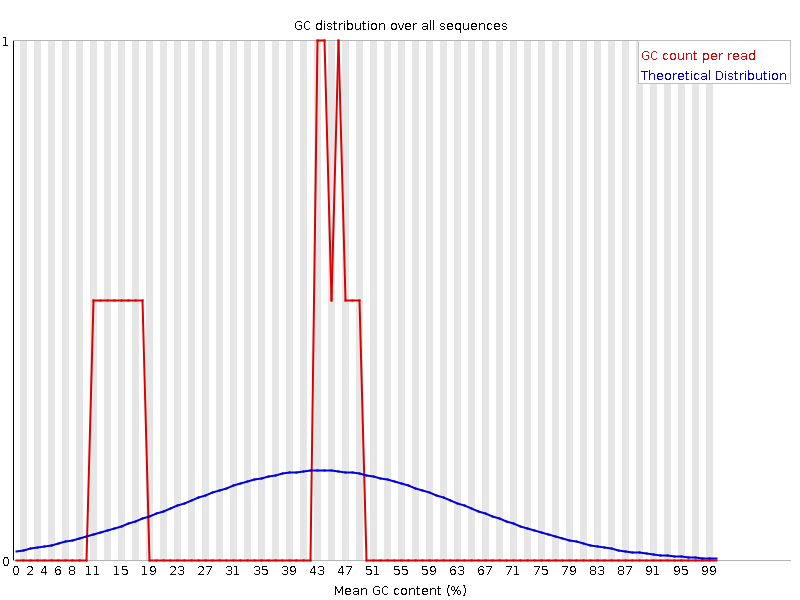

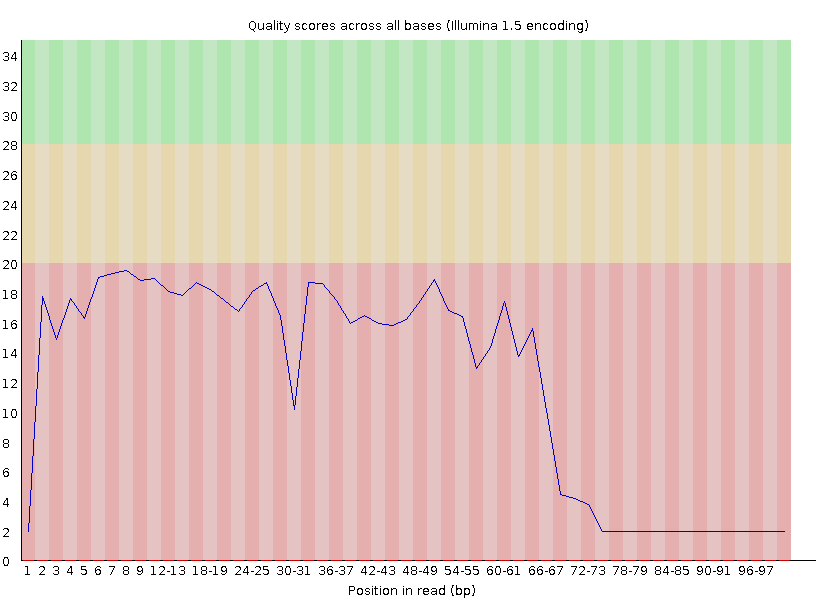

## test3.fastq

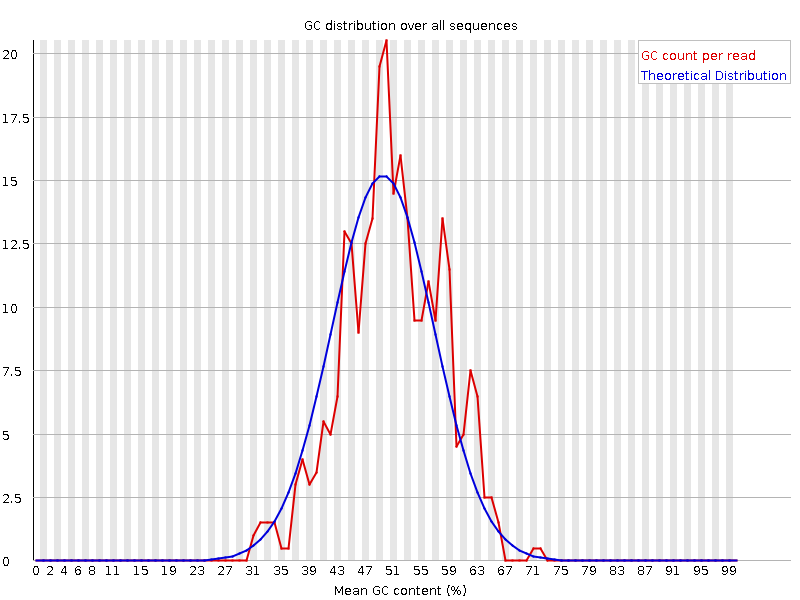

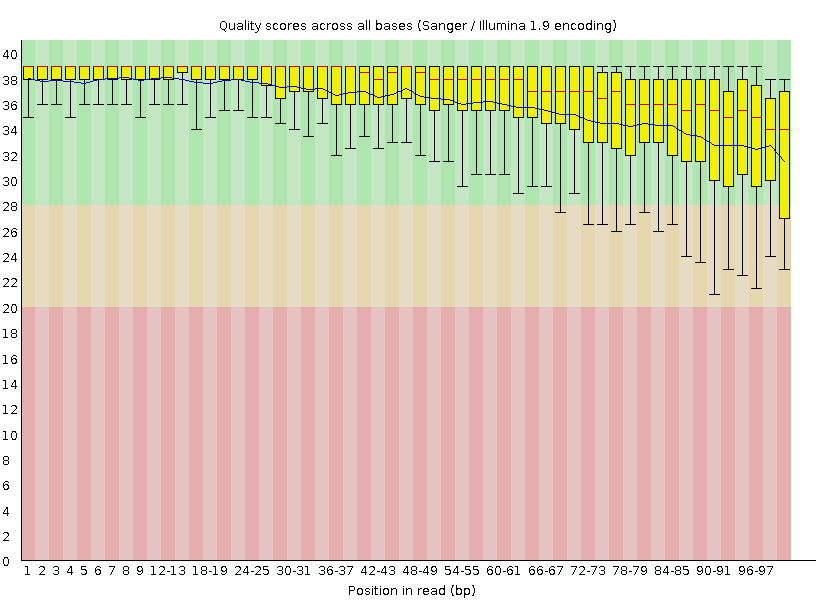

## frag.R1.fastq

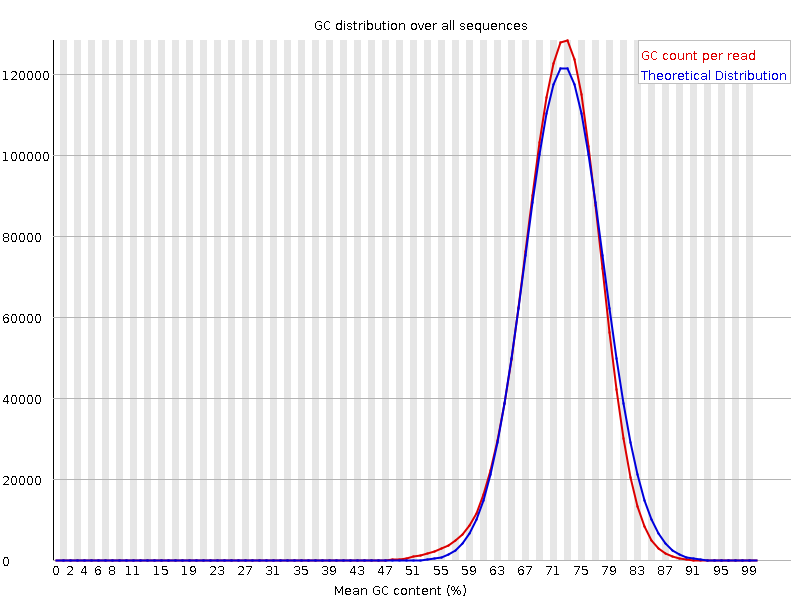

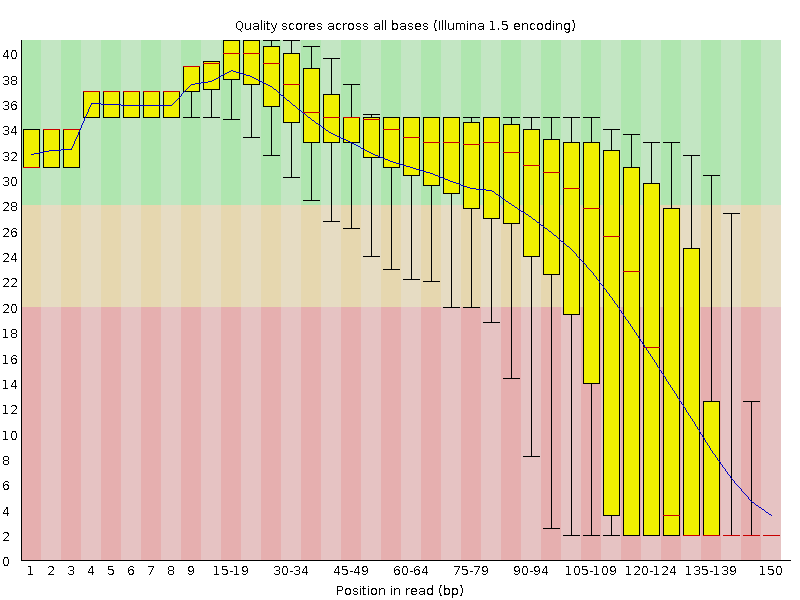

## frag.R2.fastq

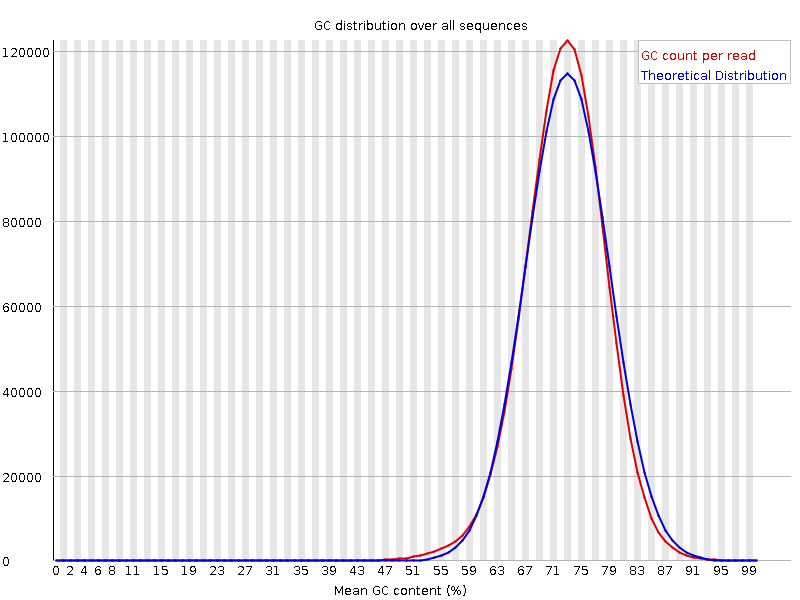

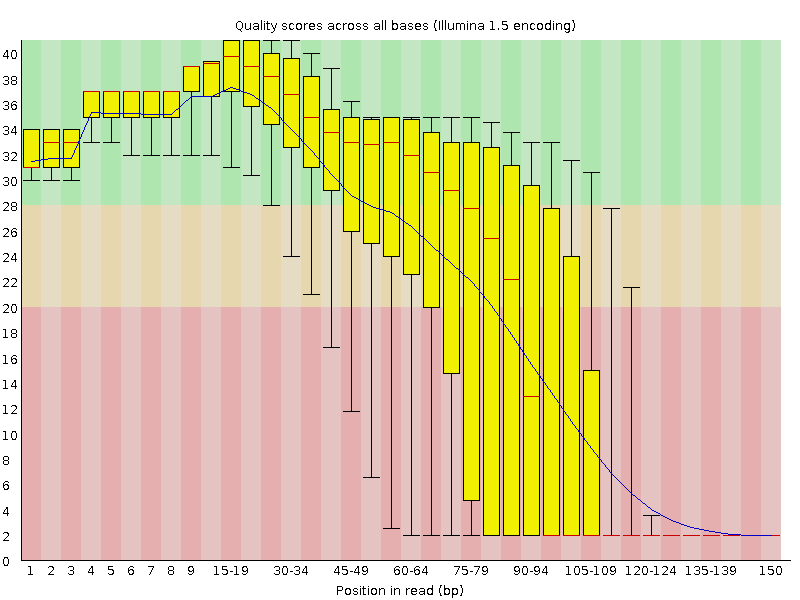